In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv('/content/IMDb Movies India.csv', encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
df.dropna(subset=df.columns[1:9],how='all',inplace=True)
df.dropna(subset=['Name','Year'],how='all',inplace=True)
df.drop_duplicates(['Name','Year'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15477 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15477 non-null  object 
 1   Year      14958 non-null  float64
 2   Duration  7235 non-null   object 
 3   Genre     13614 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13110 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


In [ ]:
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(str).str.extract(r'([0-9]{4})', expand=False)

# Extract numeric values from 'Duration' column
df['Duration'] = df['Duration'].str.extract(r'([0-9]+)', expand=False)

# Function to get the mode with a default value
def get_mode_with_default(x):
    mode_result = x.mode()
    return mode_result[0] if not mode_result.empty else 'unknown'

# Fill missing values for actors based on the most common value per year
df['Actor 1'] = df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))
df['Actor 2'] = df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))
df['Actor 3'] = df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))

# Fill missing values for director based on mode per year and actor combination
df['Director'] = df.groupby(['Year', 'Actor 1', 'Actor 2', 'Actor 3'])['Director'].transform(get_mode_with_default)

# Convert 'Duration' to numeric and fill missing values with group mean
df['Duration'] = pd.to_numeric(df['Duration'])
def get_mean_with_default(x):
    mean_result = x.mean()
    return round(mean_result) if not math.isnan(mean_result) else 0

df['Duration'] = df.groupby(['Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])['Duration'].transform(get_mean_with_default)

# Fill 'Rating' based on grouped averages
for col in ['Actor 1', 'Actor 2', 'Actor 3']:
    df['Rating'] = df.groupby(['Director', col])['Rating'].transform(lambda x: x.mean())

df['Rating'] = df.groupby(['Year', 'Director'])['Rating'].transform(lambda x: x.mean())
df['Rating'] = df.groupby('Year')['Rating'].transform(lambda x: x.mean())

# Convert 'Votes' column to numeric after extracting numeric data
df['Votes'] = df['Votes'].str.extract(r'([0-9]+)', expand=False)
df['Votes'] = pd.to_numeric(df['Votes'])

# Fill missing 'Votes' values based on grouped averages
df['Votes'] = df.groupby(['Year', 'Rating'])['Votes'].transform(lambda x: x.mean())
df['Votes'] = df.groupby('Year')['Votes'].transform(lambda x: x.mean())

# Convert 'Year' back to numeric for any potential analysis
df['Year'] = pd.to_numeric(df['Year'])

# Display the DataFrame info to confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14958 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14958 non-null  object 
 1   Year      14958 non-null  int64  
 2   Duration  14958 non-null  int64  
 3   Genre     13123 non-null  object 
 4   Rating    14947 non-null  float64
 5   Votes     14908 non-null  float64
 6   Director  14958 non-null  object 
 7   Actor 1   14958 non-null  object 
 8   Actor 2   14958 non-null  object 
 9   Actor 3   14958 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


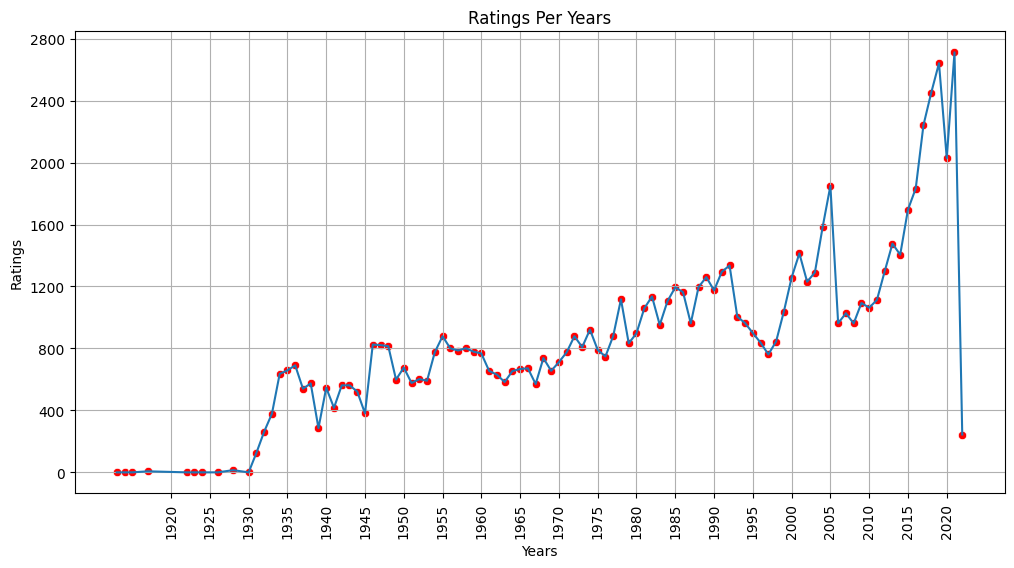

In [ ]:
#Year with best rating
rating_sum=df.groupby('Year')['Rating'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.yticks(np.arange(0,3000,400))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


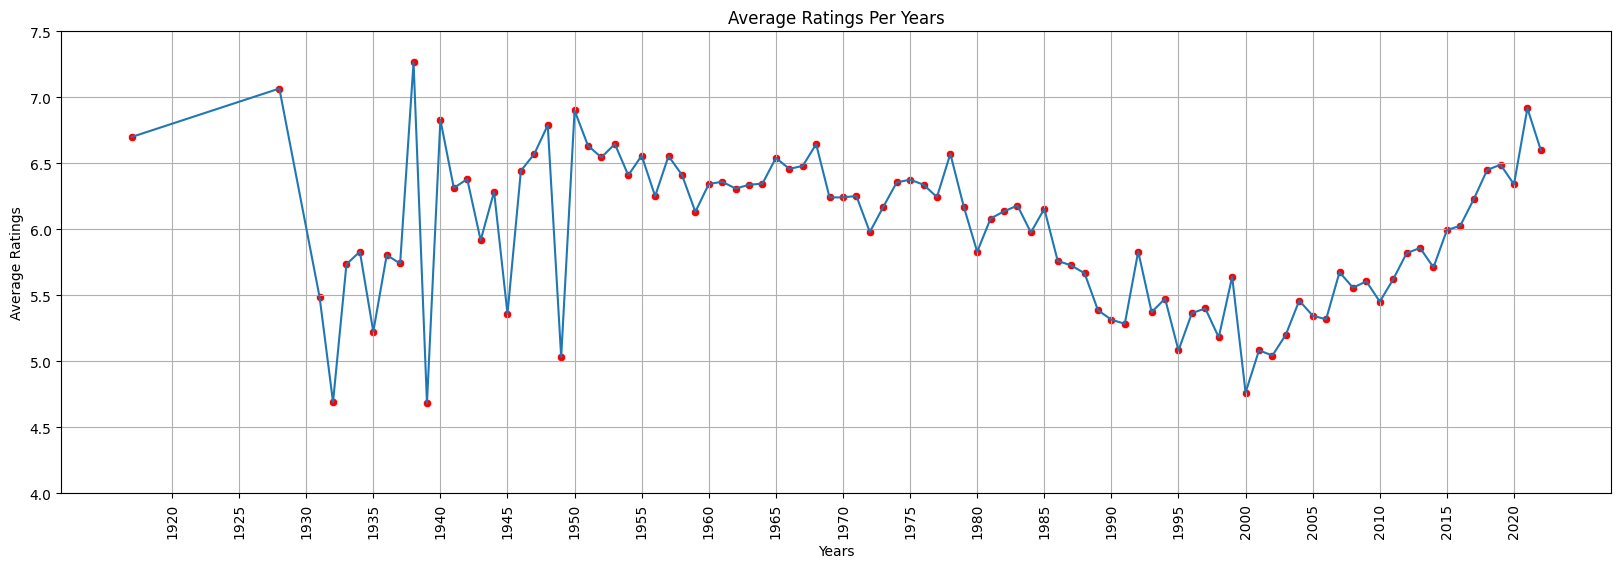

In [ ]:
#Year with best average rating
rating_avg=df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.yticks(np.arange(4,8,0.5))
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


<ipython-input-17-f165c98400fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')


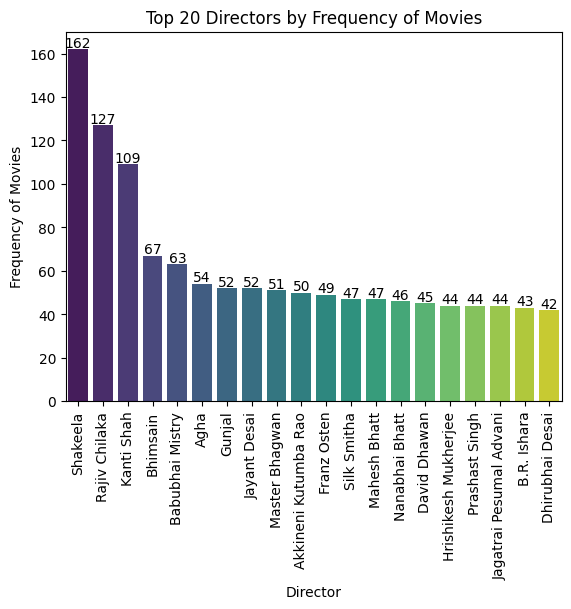

In [ ]:

# Get the top 20 directors by the frequency of movies
top_20 = df.groupby('Director')['Name'].count().sort_values(ascending=False).head(20)

# Plot the data
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Frequency of Movies')
plt.xlabel('Director')
plt.title('Top 20 Directors by Frequency of Movies')

# Display counts above the bars
for index, value in enumerate(top_20.values):
    plt.text(index, value + 1, str(value), ha='center')  # Adjust vertical position as needed

plt.show()


Correlation Of Duration And Rating is -0.07511162035794038


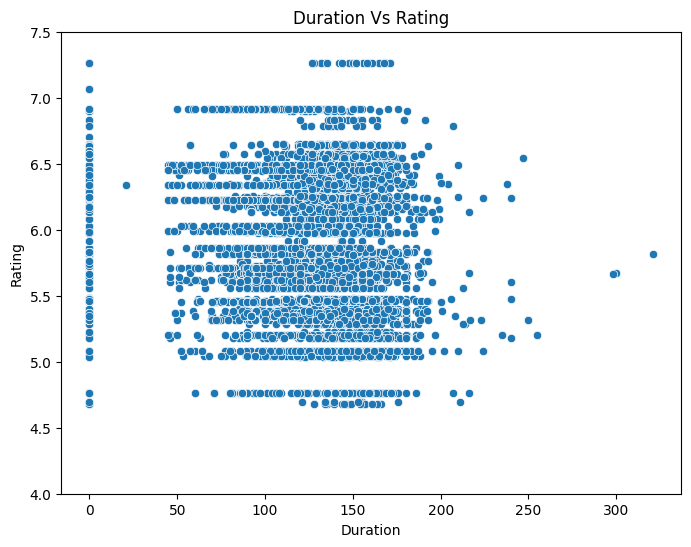

In [ ]:
#Does length of movie have any impact with the rating
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")
#show there is no impact of duration on rating

plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.yticks(np.arange(4,8,0.5))
plt.show()

In [ ]:
#Top 10 movies according to rating per year and overall.
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Abhagin,1938,151,NaN,7.266085,9.555556,Prafulla Roy,Molina Devi,Prithviraj Kapoor,Vijay Kumar
1,Abhilasha,1938,134,NaN,7.266085,9.555556,Zia Sarhadi,Mahendra Thakore,M. Kumar,Bibbo
2,Adhikar,1938,132,NaN,7.266085,9.555556,P.C. Barua,P.C. Barua,Jamuna,Pahadi Sanyal
3,Baazigar,1938,152,NaN,7.266085,9.555556,Mohan Dayaram Bhavnani,K.L. Saigal,Ashok Kumar,Bibbo
4,Baghban,1938,159,Drama,7.266085,9.555556,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi
5,Bahadur Kisan,1938,0,NaN,7.266085,9.555556,Master Bhagwan,Chandrarao,Chandrarao,Hansa Wadkar
6,Ban Ki Chidiya,1938,0,Action,7.266085,9.555556,Jayant Desai,Madhuri,Eddie Billimoria,Ishwarlal
7,Banke Sanvaria,1938,0,NaN,7.266085,9.555556,Nanubhai Vakil,Navinchandra,Vatsala Kumthekar,Yasmin
8,Bhabi,1938,0,"Drama, Family",7.266085,9.555556,Franz Osten,Renuka Devi,Paidi Jairaj,Meera
9,Bhedi Trishul,1938,0,NaN,7.266085,9.555556,A.M. Khan,Ameena,Ansari,Kamia


In [30]:
top_10_per_year = pd.DataFrame()
for year in df['Year'].unique():
    year_df = df[df['Year'] == year]
    top_10_year = year_df.nlargest(10, 'Rating').sort_values(by='Rating', ascending=False)
    top_10_per_year = pd.concat([top_10_per_year, top_10_year], ignore_index=True)

print("\nTop 10 Movies Per Year:")
print(top_10_per_year)



Top 10 Movies Per Year:
                                   Name  Year  Duration            Genre  \
0    #Gadhvi (He thought he was Gandhi)  2019       109            Drama   
1                               #Yaaram  2019       110  Comedy, Romance   
2                1978: A Teen Night Out  2019       107         Thriller   
3                          2 Band Radio  2019         0           Comedy   
4                              22 Yards  2019       126            Sport   
..                                  ...   ...       ...              ...   
929                           Ram Rahim  1930         0              NaN   
930                         Veer Na Ver  1930         0              NaN   
931                     Ram Rajya Vijay  1926         0              NaN   
932                    Satyavan Savitri  1914         0              NaN   
933                        Sita Shuddhi  1924         0              NaN   

       Rating       Votes                 Director            

In [31]:
#Number of popular movies released each year.
rat_bool=df['Rating']>=6
vot_bool=df['Votes']>110
pop_df=df[vot_bool & rat_bool]
pop_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,6.489797,121.779116,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",6.917411,114.602564,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",6.489797,121.779116,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
15,102 Not Out,2018,102,"Comedy, Drama",6.450093,111.070175,Umesh Shukla,Amitabh Bachchan,Rishi Kapoor,Vijay Raaz
20,12 Bulbule,2021,0,"Comedy, Drama, Family",6.917411,114.602564,Jagat Joon,Sonu Sonkar,Sunita Verman,Anubhav Dixit
...,...,...,...,...,...,...,...,...,...,...
15426,Zero,2018,164,"Comedy, Drama, Romance",6.450093,111.070175,Aanand L. Rai,Shah Rukh Khan,Anushka Sharma,Katrina Kaif
15479,Zindagi Tumse,2019,120,Family,6.489797,121.779116,Tariq Bhat,Sadhana Singh,Guddi Maruti,Rajesh Puri
15480,Zindagi Unlimited,2021,105,NaN,6.917411,114.602564,Vipin Agnihotri,Amit Pandey,Kanchi Rohela,Kritika Sanghavi
15484,Zinga,2021,0,"Adventure, Fantasy, Sci-Fi",6.917411,114.602564,Jaishankar Chigurula,Sri Ram,Devan Sanjeev,Kasu Naveen Kumar


In [32]:

df.dropna(inplace=True)
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


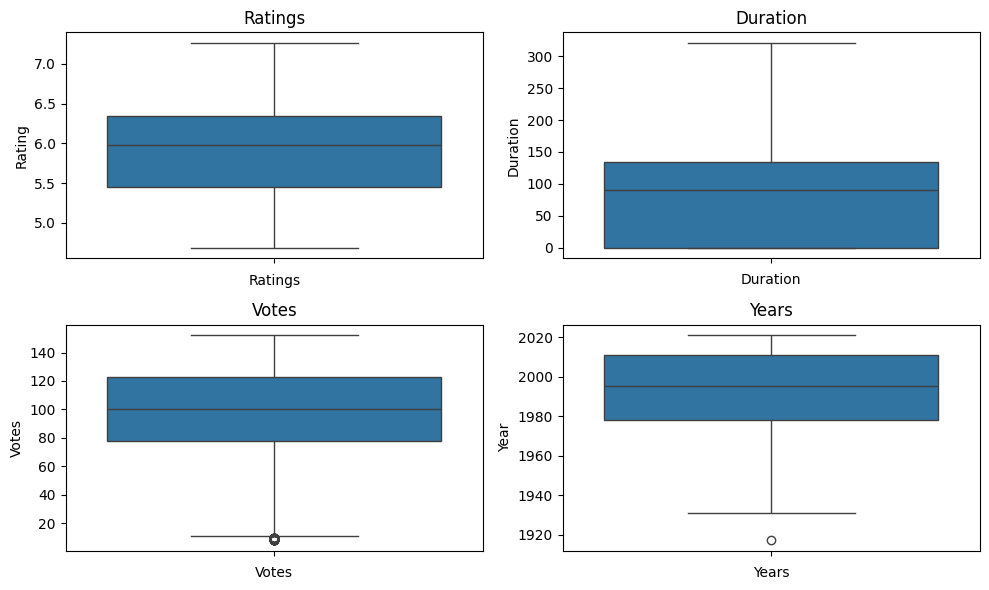

In [34]:
#df.reset_index()
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,6))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

In [35]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper

In [36]:
votes_low,votes_up=out(df,'Votes',1.5)
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)
df['Votes'][vote_out_count].count()


41

In [37]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]
year_low,year_upper=out(df,'Year',1.5)
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)
df['Year'][year_out_count].count()

1

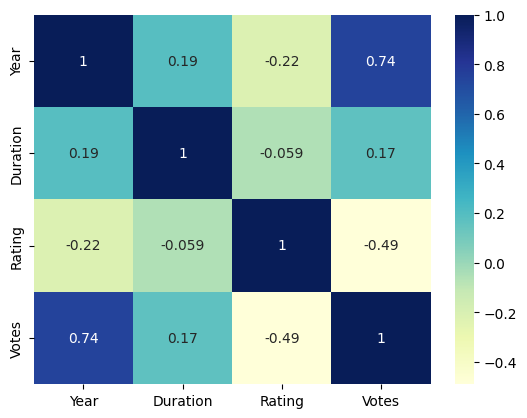

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Assuming 'df' is your DataFrame

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate correlation and plot heatmap
sns.heatmap(numerical_df.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [46]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape

(13042, 10)

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
LB = LabelEncoder()

# Use .loc to set values, ensuring no SettingWithCopyWarning
df.loc[:, 'Name'] = LB.fit_transform(df['Name'])
df.loc[:, 'Genre'] = LB.fit_transform(df['Genre'])
df.loc[:, 'Director'] = LB.fit_transform(df['Director'])
df.loc[:, 'Actor 1'] = LB.fit_transform(df['Actor 1'])
df.loc[:, 'Actor 2'] = LB.fit_transform(df['Actor 2'])
df.loc[:, 'Actor 3'] = LB.fit_transform(df['Actor 3'])


In [50]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.model_selection import train_test_split
x=df.drop('Rating',axis=1)
y=df['Rating']
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)
LR.fit(train_x,train_y)
pre_test=LR.predict(test_x)
pre_test

array([5.55081406, 5.40310352, 6.5324513 , ..., 6.4962695 , 6.34893295,
       5.98954507])

In [53]:
pre_train=LR.predict(train_x)
from sklearn.metrics import r2_score
score_test=r2_score(test_y,pre_test)
score_train=r2_score(train_y,pre_train)
print("print r2_score",score_test)
print('print r2_score',score_train)

print r2_score 0.28209206354087324
print r2_score 0.29301805255621727


In [54]:
from sklearn.linear_model import Ridge
RL=Ridge(alpha=10.0)
RL.fit(train_x,train_y)
RL_pre_test=RL.predict(test_x)
RL_pre_train=RL.predict(train_x)
r2_RL_test=r2_score(test_y,RL_pre_test)
r2_RL_train=r2_score(train_y,RL_pre_train)
print("print r2_score",r2_RL_test)
print('print r2_score',r2_RL_train)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, RL_pre_test)
print(mse)

print r2_score 0.28209224108114717
print r2_score 0.29301805255099334
0.1900703547082889


In [55]:
from sklearn.model_selection import GridSearchCV

param={'alpha':[0.01, 0.1, 1.0, 10.0]}
grid=GridSearchCV(estimator=RL,param_grid=param,cv=5)
grid.fit(train_x,train_y)

print(grid.best_params_,grid.best_estimator_)

{'alpha': 10.0} Ridge(alpha=10.0)


In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(n_splits=10,random_state=42,shuffle=True)
cv=cross_val_score(RL,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv.mean()*100)

Accuracy :  28.804611887967578


In [57]:
from sklearn.model_selection import RepeatedKFold
rfk=RepeatedKFold(n_splits=10,random_state=42,n_repeats=5)
cv1=cross_val_score(RL,x,y,cv=rfk,n_jobs=-1)
print('Accuracy : ',cv1.mean()*100)

Accuracy :  28.83062221371083


In [58]:
from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(train_x, train_y)
lgbm_pre_test = LGBMR.predict(test_x)
lgbm_pre_train=LGBMR.predict(train_x)
r2_test_lgbm=r2_score(test_y,lgbm_pre_test)
r2_train_lgbm=r2_score(train_y,lgbm_pre_train)
print("print r2_score",r2_test_lgbm)
print('print r2_score',r2_train_lgbm)
mse_lgbm = mean_squared_error(test_y, RL_pre_test)
print(mse_lgbm)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002662 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1819
[LightGBM] [Info] Number of data points in the train set: 9129, number of used features: 9
[LightGBM] [Info] Start training from score 5.900669
print r2_score 0.9998591852734113
print r2_score 0.9999080844519986
0.1900703547082889


In [59]:
cv2=cross_val_score(LGBMR,x,y,cv=kf,n_jobs=-1)
print('Accuracy : ',cv2.mean()*100)

Accuracy :  99.97977306852685


In [60]:
cv3=cross_val_score(LGBMR,x,y,cv=rfk,n_jobs=-1)
print('Accuracy : ',cv3.mean()*100)

Accuracy :  99.98072678306296
